In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime


In [2]:
with open('trans1.json','r') as f1:
    data1= (line.strip() for line in f1)
    data_json1="[{0}]".format(','.join(data1))

In [3]:
data1 = pd.read_json(data_json1)


In [4]:
data1.shape

(391085, 29)

In [5]:
with open('trans2.json','r') as f2:
    data2= (line.strip() for line in f2)
    data_json2="[{0}]".format(','.join(data2))

In [6]:
data2=pd.read_json(data_json2)

In [7]:
data2.shape

(395278, 29)

In [8]:
df= pd.merge(data1,data2,how='outer')

In [9]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


info shows no null entries, but there are clearly are some null/empty entries

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [11]:
#check for empty columns

empty_columns=df.loc[:, (df == '').all()]
empty_columns.head()

C:\Users\vtou2\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,


In [12]:
#accountNumber and customerID are exactly the same

same_id=np.where(df["accountNumber"] == df["customerId"], True, False)
df[same_id==False]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud


In [13]:
#dropping empty and duplicated columns


df=df.drop(columns=['accountNumber','echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'])

In [14]:
df.shape

(786363, 22)

In [15]:
df.head(10)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
5,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
6,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
7,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
8,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,True,False,False
9,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,08,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False


In [16]:
#replace empty spaces with NaN values

df = df.replace('',np.nan, regex=True)

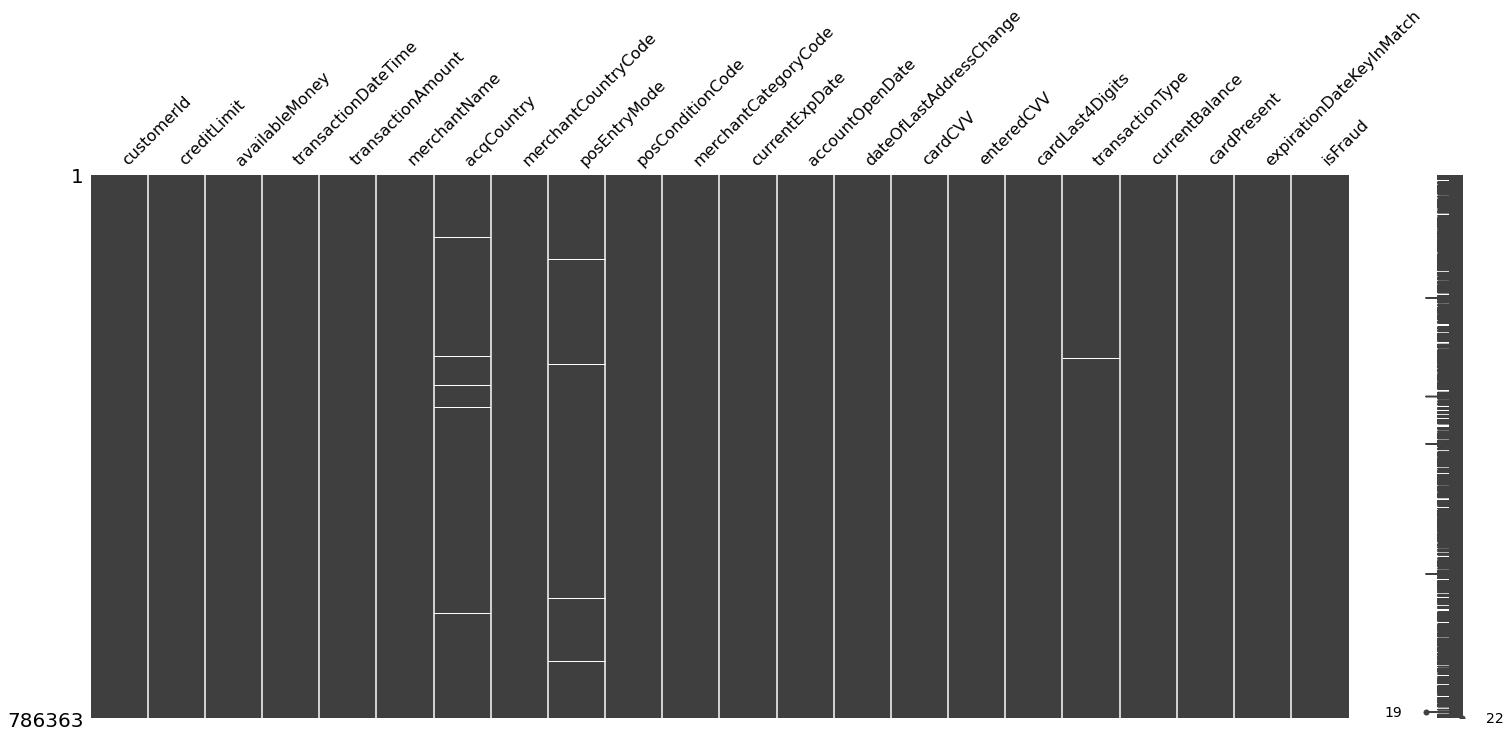

In [17]:
msno.matrix(df)

In [18]:
#Create a dataframe for entries with null values

columns_null = pd.DataFrame({'na_count':df.isnull().sum()})
columns_null['percent']=round(columns_null['na_count']/len(df)*100,2)
columns_null

,na_count,percent
customerId,0,0.00
creditLimit,0,0.00
availableMoney,0,0.00
transactionDateTime,0,0.00
transactionAmount,0,0.00
merchantName,0,0.00
acqCountry,4562,0.58
merchantCountryCode,724,0.09
posEntryMode,4054,0.52
posConditionCode,409,0.05


In [19]:
#amount of nulls for the columns are each under 1% of total data, so dropping them all will not affect the outcome

df = df.dropna()
print(df.shape)

(776668, 22)


In [20]:
#Check for duplicated rows

df.duplicated().sum()

0

In [21]:
#There are 4997 unique customer ID's

customers=df.customerId.unique()
len(customers)

4997

# Looking at acqCountry and merchantCountryCode

In [22]:
#acqCountry and merchantCountryCode appears to be the same, but there are 67 instances where they do not match

sum(df.acqCountry.values!=df.merchantCountryCode)

67

In [23]:
#subset where acqCountry does not match with merchantCountryCode

acq_not_merch = df[df.acqCountry.values!=df.merchantCountryCode][['customerId','acqCountry','merchantCountryCode','isFraud']]
acq_not_merch.head()

,customerId,acqCountry,merchantCountryCode,isFraud
523,984504651,US,PR,False
12629,593440936,CAN,US,False
34624,657326011,US,CAN,False
58521,246251253,CAN,US,False
61725,445843699,US,MEX,False


In [24]:
#this umatching does not seem to affect or cause fraud

sum(acq_not_merch.isFraud)

0

In [27]:
nonmatch_df = pd.DataFrame(acq_not_merch.customerId.value_counts()).rename(columns={'customerId':'Count'})

a = {}

for i in nonmatch_df.index:
    b = len(df[df.customerId==i])
    a[i]=b
    
nonmatch_df2=pd.DataFrame(a,index=['Total_Transactions']).T
print( nonmatch_df.head() )
print(nonmatch_df2.head())

           Count
272804274     12
380680241      3
964624120      2
445843699      2
240360270      2
           Total_Transactions
272804274                  63
380680241               32467
964624120                 275
445843699                1210
240360270                 282


In [28]:
#merge

nonmatch_df = nonmatch_df.merge(nonmatch_df2,left_index=True,right_index=True)
nonmatch_df['Perc']= round(nonmatch_df.Count/nonmatch_df.Total_Transactions*100,3)

In [29]:
''' 
Most entries where acqCountry does not match merchantCountryCode contain less than 1% of each customer's transaction,
except one customer where they have the highest unmatch and also the highest percentage.
Also, the total amount of unmatches is very little compared to the whole data.
'''

print('Percentage of total unmatching: ' + str(round(len(nonmatch_df)/len(df)*100,4))+' %')
nonmatch_df

Percentage of total unmatching: 0.0064 %


,Count,Total_Transactions,Perc
272804274,12,63,19.048
380680241,3,32467,0.009
964624120,2,275,0.727
445843699,2,1210,0.165
240360270,2,282,0.709
283694178,2,1485,0.135
865635967,1,1262,0.079
373215405,1,156,0.641
375252798,1,1411,0.071
657326011,1,1120,0.089


In [30]:
#look more into customerId, 272804274

cust1 = df[df.customerId==272804274]
cust1

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
496555,272804274,20000,20000.00,2016-01-11T17:41:15,5.66,cheapfast.com,US,US,05,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,0.00,False,False,False
496556,272804274,20000,19994.34,2016-01-18T06:42:06,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,5.66,False,False,False
496557,272804274,20000,20000.00,2016-02-18T17:56:05,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,0.00,False,False,False
496558,272804274,20000,20000.00,2016-03-01T09:54:21,202.36,Subway #105984,US,US,05,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,0.00,True,False,False
496559,272804274,20000,19797.64,2016-03-06T22:28:24,170.87,oldnavy.com,US,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,202.36,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496613,272804274,20000,19282.05,2016-12-12T04:33:36,45.46,Sunoco Gas #403204,US,US,09,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,717.95,True,False,False
496614,272804274,20000,19236.59,2016-12-18T23:50:33,7.81,Play Store,US,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,763.41,False,False,False
496615,272804274,20000,19228.78,2016-12-25T02:38:02,68.94,target.com,US,US,09,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,771.22,False,False,False
496616,272804274,20000,19159.84,2016-12-25T05:50:19,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,840.16,False,False,False


In [31]:
# This appears to only be happening with the merchant abc.com

cust1_abc = cust1[cust1.acqCountry!=cust1.merchantCountryCode]
cust1_abc

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
496556,272804274,20000,19994.34,2016-01-18T06:42:06,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,5.66,False,False,False
496557,272804274,20000,20000.00,2016-02-18T17:56:05,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,0.00,False,False,False
496562,272804274,20000,19364.97,2016-03-20T11:08:04,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,635.03,False,False,False
496569,272804274,20000,19611.59,2016-04-20T19:52:45,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,388.41,False,False,False
496577,272804274,20000,19704.49,2016-05-22T11:52:30,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,295.51,False,False,False
496581,272804274,20000,19946.73,2016-06-22T09:28:46,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,53.27,False,False,False
496588,272804274,20000,19937.94,2016-07-23T11:02:45,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,62.06,False,False,False
496593,272804274,20000,19897.31,2016-08-23T18:13:37,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,102.69,False,False,False
496597,272804274,20000,19891.77,2016-09-24T00:41:40,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,108.23,False,False,False
496603,272804274,20000,19872.62,2016-10-25T18:58:48,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,127.38,False,False,False


In [32]:
#Take a look at all of abc.com transaction

abc = df[df.merchantName=='abc.com']
abc

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
1647,239577603,5000,1329.10,2016-07-12T15:59:14,13.86,abc.com,US,US,02,01,...,2015-08-12,2015-08-12,808,808,3135,PURCHASE,3670.90,False,False,False
1650,239577603,5000,1017.00,2016-08-13T14:23:06,13.86,abc.com,US,US,02,01,...,2015-08-12,2015-08-12,808,808,3135,PURCHASE,3983.00,False,False,False
1653,239577603,5000,809.16,2016-09-13T22:29:49,13.86,abc.com,US,US,02,01,...,2015-08-12,2015-08-12,808,808,3135,PURCHASE,4190.84,False,False,False
1657,239577603,5000,520.50,2016-10-15T11:41:47,13.86,abc.com,US,US,02,01,...,2015-08-12,2015-08-12,808,808,3135,PURCHASE,4479.50,False,False,False
1664,239577603,5000,1130.61,2016-11-15T09:40:37,13.86,abc.com,US,US,02,01,...,2015-08-12,2015-08-12,808,808,3135,PURCHASE,3869.39,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785887,428856030,250,77.76,2016-08-22T23:12:59,15.82,abc.com,US,US,05,01,...,2009-08-17,2009-08-17,990,990,7660,PURCHASE,172.24,False,False,False
785900,428856030,250,102.23,2016-09-23T06:11:26,15.82,abc.com,US,US,05,01,...,2009-08-17,2009-08-17,990,990,7660,PURCHASE,147.77,False,False,False
785911,428856030,250,202.37,2016-10-24T18:10:07,15.82,abc.com,US,US,05,01,...,2009-08-17,2009-08-17,990,990,7660,PURCHASE,47.63,False,False,False
785920,428856030,250,114.11,2016-11-25T14:42:38,15.82,abc.com,US,US,05,01,...,2009-08-17,2009-08-17,990,990,7660,PURCHASE,135.89,False,False,False


In [33]:
#It appears out of 2,851 transactions with abc.com, only 12 does not match and they all belong to the same customer. 

abc[abc.acqCountry!=abc.merchantCountryCode]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
496556,272804274,20000,19994.34,2016-01-18T06:42:06,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,5.66,False,False,False
496557,272804274,20000,20000.00,2016-02-18T17:56:05,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,0.00,False,False,False
496562,272804274,20000,19364.97,2016-03-20T11:08:04,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,635.03,False,False,False
496569,272804274,20000,19611.59,2016-04-20T19:52:45,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,388.41,False,False,False
496577,272804274,20000,19704.49,2016-05-22T11:52:30,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,295.51,False,False,False
496581,272804274,20000,19946.73,2016-06-22T09:28:46,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,53.27,False,False,False
496588,272804274,20000,19937.94,2016-07-23T11:02:45,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,62.06,False,False,False
496593,272804274,20000,19897.31,2016-08-23T18:13:37,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,102.69,False,False,False
496597,272804274,20000,19891.77,2016-09-24T00:41:40,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,108.23,False,False,False
496603,272804274,20000,19872.62,2016-10-25T18:58:48,19.41,abc.com,MEX,US,02,01,...,2014-03-01,2014-03-01,228,228,1010,PURCHASE,127.38,False,False,False


In [34]:
print(cust1.acqCountry.value_counts())
print(cust1.merchantCountryCode.value_counts())

US     51
MEX    12
Name: acqCountry, dtype: int64
US    63
Name: merchantCountryCode, dtype: int64


In [35]:
'''
All values of acqCountry and merchantCountryCode for customer 272804274 is either US or MEX,
but 12 does not match each other.  Those 12 contain the only values of MEX for that customer.  This might be an error. 
Replace MEX with US
'''

rows = cust1_abc.index

df.loc[rows,'acqCountry'] = df[df.customerId==272804274]['acqCountry'].str.replace('MEX','US')

print(df[df.customerId==272804274].acqCountry.unique())
print(df[df.customerId==272804274].merchantCountryCode.unique())

['US']
['US']


# Do the same with the other unmatches or drop?  

Since the other 49 customers that have unmatching entries contain about or less than 1% of their total data, it'll save more time just to drop them and this will have almost no affect on the overall data. 

In [36]:
# Drop all entries where acqCountry does not match merchantCountryCode

rows_to_drop = df[df['acqCountry']!=df['merchantCountryCode']].index

df = df.drop(rows_to_drop)

print(df.shape)

(776613, 22)


In [37]:
#Now that acqCountry and merchantCuntryCode are exactly the same, drop one

df=df.drop(columns=['merchantCountryCode'])
print(df.shape)

(776613, 21)


In [38]:
#The actual card VV is not important, what's more important is if the entered CVV matches.
#So create a new column where 0 if it matches and 1 if it doesn't.
#Drop the other two columns

df['Incorrect CVV Entered']= np.where(df.cardCVV==df.enteredCVV,0,1)
df=df.drop(columns = ['cardCVV','enteredCVV'])

In [39]:
# Change the bool Dtypes to int64 by changing false to 0 and true to 1

df['cardPresent']=df['cardPresent'].replace([False,True],[0,1])
df['expirationDateKeyInMatch']=df['expirationDateKeyInMatch'].replace([False,True],[0,1])
df['isFraud']=df['isFraud'].replace([False,True],[0,1])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776613 entries, 0 to 786362
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customerId                776613 non-null  int64  
 1   creditLimit               776613 non-null  int64  
 2   availableMoney            776613 non-null  float64
 3   transactionDateTime       776613 non-null  object 
 4   transactionAmount         776613 non-null  float64
 5   merchantName              776613 non-null  object 
 6   acqCountry                776613 non-null  object 
 7   posEntryMode              776613 non-null  object 
 8   posConditionCode          776613 non-null  object 
 9   merchantCategoryCode      776613 non-null  object 
 10  currentExpDate            776613 non-null  object 
 11  accountOpenDate           776613 non-null  object 
 12  dateOfLastAddressChange   776613 non-null  object 
 13  cardLast4Digits           776613 non-null  i

In [41]:
#fix data types

df[['customerId','cardLast4Digits']]=df[['customerId','cardLast4Digits']].astype('object')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776613 entries, 0 to 786362
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customerId                776613 non-null  object 
 1   creditLimit               776613 non-null  int64  
 2   availableMoney            776613 non-null  float64
 3   transactionDateTime       776613 non-null  object 
 4   transactionAmount         776613 non-null  float64
 5   merchantName              776613 non-null  object 
 6   acqCountry                776613 non-null  object 
 7   posEntryMode              776613 non-null  object 
 8   posConditionCode          776613 non-null  object 
 9   merchantCategoryCode      776613 non-null  object 
 10  currentExpDate            776613 non-null  object 
 11  accountOpenDate           776613 non-null  object 
 12  dateOfLastAddressChange   776613 non-null  object 
 13  cardLast4Digits           776613 non-null  o

In [43]:
df.head(10)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Incorrect CVV Entered
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,1803,PURCHASE,0.0,0,0,0,0
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,767,PURCHASE,0.0,1,0,0,0
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0
5,830329091,5000,5000.0,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0
6,830329091,5000,5000.0,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0
7,830329091,5000,5000.0,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0
9,830329091,5000,5000.0,2016-07-11T10:47:16,164.37,Five Guys #510989,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0
10,830329091,5000,5000.0,2016-09-07T20:22:47,160.18,Auntie Anne's #747964,US,02,08,fastfood,05/2023,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0


In [ ]:
#col_names=['customerId','date','time', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud']
#df=df.reindex(columns=col_names)

In [ ]:
datapath = '../Springboard'
save_file(df, 'fraud_data_cleaned.csv', datapath)